In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import seaborn as sns
pd.__version__

# Style 
plt.style.use('ggplot')
%matplotlib inline

# Reading Data

In [2]:
# Read labels dataframe
df_labels = pd.read_csv('labels.txt',sep='\n', delimiter=',', header=None )
# Data can not be read before labels have been cleaned.

# Data Cleaning:

In [3]:
# There is dublicated names. In the info.txt we can see that the dublicates is from hand:
# A function is created to add hand to the name of label the second time the label name is found. 
def uniquify(df_columns):
    df_columns = df_columns.T.iloc[0,:]
    seen = list()

    for item in df_columns:
        fudge = 'hand'
        newitem = item
        
        if newitem in seen:
            newitem = "{}_{}".format(item, fudge)

        seen.append(newitem)
    return seen

# Change labels:
label_list = uniquify(df_labels)

In [4]:
# Read data
df = pd.read_csv('data.txt', header=None, names=label_list, na_values = 'N/A')#, set_flags(allows_duplicate_labels=False))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Columns: 535 entries, Subject index (1-40) to Activity
dtypes: float64(520), int64(14), object(1)
memory usage: 18.3+ MB


In [6]:
df.head()

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis_hand,EDA_Functionals_power_Filt2max_hand,EDA_Functionals_power_Filt2min_hand,EDA_Functionals_power_Filt2prctile25_hand,EDA_Functionals_power_Filt2prctile75_hand,EDA_Functionals_power_Filt2geomean(abs)_hand,EDA_Functionals_power_Filt2harmmean_hand,EDA_Functionals_power_Filt2mad_hand,EDA_Functionals_power_Filt2baseline_hand,Activity
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,.0f
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,.0f
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.66530,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.25860,1234110.0,3004430.0,.0f
3,1,0.014525,0.176636,-0.006161,-0.02737,1.024900,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,.0f
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,.0f


## Changing the label col from object to numbers.

In [7]:
df.iloc[:,-1].unique()
# The values of the label is:
# array(['\x01.0f', '\x03.0f', '\x02.0f', '\x04.0f'], dtype=object)
# This will be changed to 1-4
for index, rows in df.iterrows():
    if df.loc[index, 'Activity'] == '\x01.0f':
        df.loc[index, 'Activity'] = 1
    elif df.loc[index, 'Activity'] == '\x02.0f':
        df.loc[index, 'Activity'] = 2
    elif df.loc[index, 'Activity'] == '\x03.0f':
        df.loc[index, 'Activity'] = 3
    elif df.loc[index, 'Activity'] == '\x04.0f':
        df.loc[index, 'Activity'] = 4

## Checking for NA

In [10]:
for col in range(df.shape[1]):
    # YOUR CODE HERE
    n_miss = df.isnull().sum(axis=0)
    if n_miss.iloc[col] > 0:
        print('Column {} has {} missing values.'.format(col, n_miss.iloc[col]))

# There are no NA in dataset.

# Summary statistics: 

* The first column correspond to the index of the subject. 
* The next 174 attributes are statistics extracted from the ECG signal. 
* The next 151 attributes are features extracted from the TEB signal. 
* The next 104 attributes come from the EDA measured in the arm.
* The next 104 ones from the EDA in the hand. 
* The last attribute is the pattern class, that is, the corresponding activity: 1-neutral, 2-emotional, 3-mental and 4-physical.

## Testing for class equality

In [11]:
num_in_group = df.groupby(['Subject index (1-40)', 'Activity']).count()
display(num_in_group)
# There is 28 obs for each activity for each person. 
# There are 40 persons, 
# 28*40 = 1120 rows in each Activity.

ECG_original_mean  ECG_original_std  \
Subject index (1-40) Activity                                        
1                    1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   
2                    1                        28                28   
...                                          ...               ...   
39                   4                        28                28   
40                   1                        28                28   
                     2                        28                28   
                     3                        28                28   
                     4                        28                28   

                               ECG_original_trimmean25  ECG_original_median  \
Subject index (1-40) Activity                                                 
1                    1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   
2                    1                              28                   28   
...                                                ...                  ...   
39                   4                              28                   28   
40                   1                              28                   28   
                     2                              28                   28   
                     3                              28                   28   
                     4                              28                   28   

                               ECG_original_skewness  ECG_original_kurtosis  \
Subject index (1-40) Activity                                                 
1                    1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   
2                    1                            28                     28   
...                                              ...                    ...   
39                   4                            28                     28   
40                   1                            28                     28   
                     2                            28                     28   
                     3                            28                     28   
                     4                            28                     28   

                               ECG_original_max  ECG_original_min  \
Subject index (1-40) Activity                                       
1                    1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   
2                    1                       28                28   
...                                         ...               ...   
39                   4                       28                28   
40                   1                       28                28   
                     2                       28                28   
                     3                       28                28   
                     4                       28                28   

                               ECG_original_prctile25  ECG_original_prctile75  \
Subject index (1-40) Activity                                                   
1   

# Preprocessing and Dimensionality reduction

In [12]:
# Defining X and y
X = df.iloc[:,1:-1]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y=y.astype('int')

## Check for variance of 0

In [13]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)
constant_columns = [column for column in X.columns if column not in X.columns[constant_filter.get_support()]]
for column in constant_columns:
    print("Removed ", column)
    X.drop([column], axis=1, inplace=True)
    
# Four variables is removed doe to being constant. 

Removed  ECG_p_VFL_kurtosis
Removed  ECG_p_LF_kurtosis
Removed  IT_VLF_kurtosis
Removed  IT_LF_kurtosis_hand


## Scaling

In [14]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Between 0 and 1 
# transform data
X_scaled = scaler.fit_transform(X) # Sin of data leakage - BAM!

## PCA feature selection

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True) # Whiten - Used for uncorrelation of variables - good for future predictions 
pca_transformed = pca.fit_transform(X_scaled) # Also data leakage - should have been on X_train
print(pca_transformed.shape)

(4480, 64)


(0.0, 10.0)

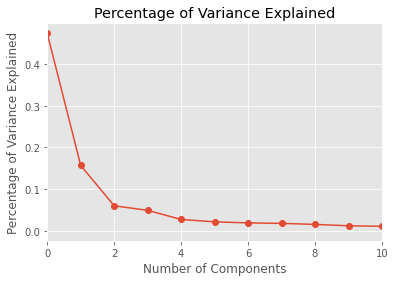

In [25]:
# Scree plot
plt.plot(pca.explained_variance_ratio_, linestyle='-', marker='o')
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')
plt.xlim(0,10)


Text(0, 0.5, 'cumulative explained variance')

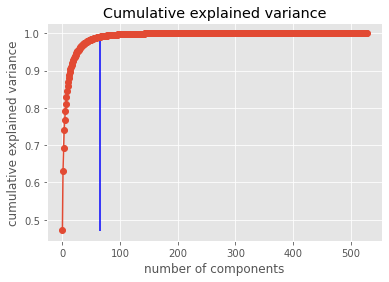

In [26]:
# Chosing number of componentes
pca_num = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_num.explained_variance_ratio_), linestyle='-', marker='o',)
plt.vlines(ymax=0.99, ymin=0.47, x=66, color='b')
plt.title('Cumulative explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Anova feature selection

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
# Anova:
anova_filter = SelectKBest(f_classif, k=40) #40 features is random number 
# learn relationship from training data
anova_filter.fit(X_scaled, y.values.ravel()) #ravel flattens the data, (transform row to column) 
# transform train input data
X_anova_filter = anova_filter.transform(X_scaled)
print(X_anova_filter.shape)

(4480, 40)


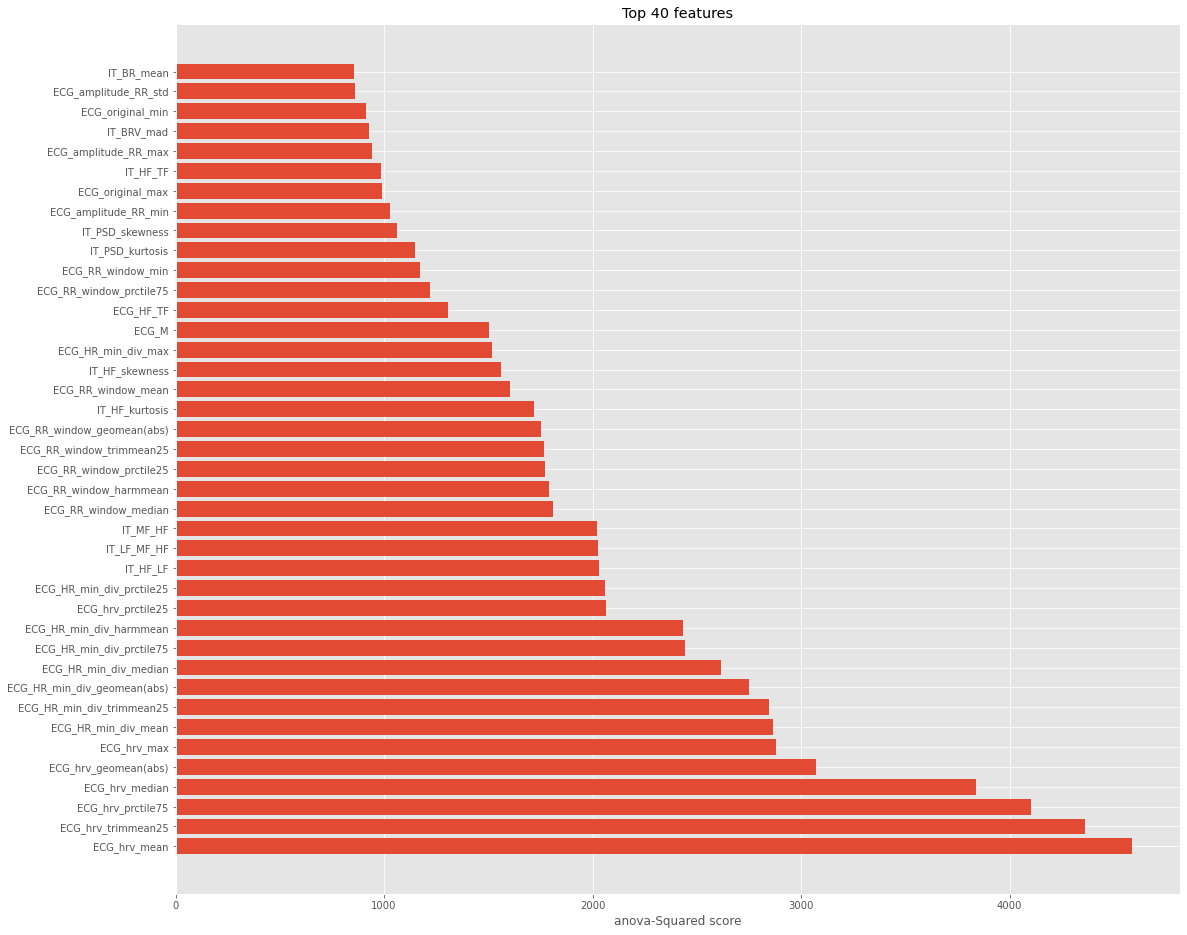

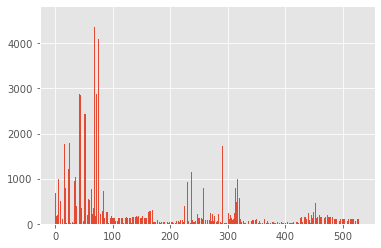

In [28]:
# Plot top anova features
dfscores = pd.DataFrame(anova_filter.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

top_100 = featureScores.sort_values('Score', ascending=False)
good_score = top_100.iloc[0:40,:]
plt.figure(figsize= ( 18 , 16))
plt.barh(good_score['Specs'], good_score['Score'])
#plt.xticks(rotation=90)
plt.xlabel('anova-Squared score')
plt.title('Top 40 features')
plt.show()

from matplotlib import pyplot
pyplot.bar([i for i in range(len(anova_filter.scores_))], anova_filter.scores_)
pyplot.show()

## Splitting data in X_train, X_train_pca, X_train_anova

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42) #stratify = secure balancing of data in test-train split 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_transformed, y, test_size=0.2, stratify=y, random_state=42)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = train_test_split(X_anova_filter, y, test_size=0.2, stratify=y, random_state=42)

# Logistisk regression

## The orginal data:

For the below regression the X_train is changed to X_train_anova or X_train_pca to get the different results.

### Setup and test the hyperparameters to test and the Grid to gridsearch 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Hyperparametre:
Cs = [1, 10, 20, 50] # Inverse of regularization strength
solvers=['newton-cg', 'lbfgs', 'sag','saga'] #For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ 
penaltys=['l1', 'l2'] #L1 - Lasso, L2 - Ridge 

# Grid to grid serarch cv
param_grid_lr = dict(C=Cs, solver=solvers, penalty=penaltys)

grid = GridSearchCV(LogisticRegression(multi_class='multinomial',max_iter=10000), param_grid=param_grid_lr,
                    cv=3, return_train_score=True, verbose=True) 

lr=grid.fit(X_train, y_train.values.ravel())

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\matze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\matze\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matze\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\matze\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\matze\anaconda3\lib\site-packages\sklearn\model_selectio

KeyboardInterrupt: 

### The different combinations of hyperparameters with train - test score

In [ ]:
res = pd.DataFrame(grid.cv_results_)
pivot=res.pivot_table(index=["param_C","param_solver","param_penalty"],
                values=['mean_train_score', "mean_test_score"])
print (pivot)

### Logistisk regression with the chosen hyperparameters

In [ ]:
pred = lr.predict(X_test)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test.values.ravel(), pred)

print(conf)

### Heatmap/confusion matrix

In [ ]:
y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] # labels for y-axis
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']

g=sns.heatmap((4*conf)/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 8)

In [ ]:
print(classification_report(y_test.values.ravel(), pred))

# Random Forrest

For the below regression the X_train is changed to X_train_anova or X_train_pca to get the different results.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Setup the RandomForestClassifier:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls

### Find the best # of estimators:

In [ ]:
from sklearn.model_selection import cross_val_score

estimator_range = range(10, 310, 10) #number of trees in forest

accuracy_scores = []

# Trying from 10 to 300 estimators 
for estimator in estimator_range:
    rf_cls = RandomForestClassifier(n_estimators=estimator, random_state=42)
    accuracy = cross_val_score(rf_cls, 
                                 X_train, 
                                 y_train, 
                                 scoring='accuracy',
                                 n_jobs=-1, 
                                 cv=5)
    
    accuracy_scores.append(np.mean(accuracy))
    print('Testing',estimator, '/300 estimators')

In [ ]:
# Plot the accuracy scores vs estimators:
n_estimators = range(10, 310, 10)
plt.plot(n_estimators, accuracy_scores, 'g')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Find the best number of estimators
x = sorted(zip(accuracy_scores, n_estimators))
err, num_est = x[-1]
print('Maximum accuracy is {} and its corresponding number of estimators is {}.'.format(err, num_est))

### Find the best # of features

In [ ]:
feature_range = range(1, 40) #max 40 features in each tree
accuracy_scores_feat = []

for feature in feature_range:
    rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=feature, random_state=42)
    accuracy = cross_val_score(rf_cls, 
                                 X_train, 
                                 y_train, 
                                 scoring='accuracy',
                                 n_jobs=-1, 
                                 cv=5)
    
    accuracy_scores_feat.append(np.mean(accuracy))
    print(feature, '/40 features tested')

In [ ]:
# Plot the accuracy scores vs feature range:
plt.plot(feature_range, accuracy_scores_feat, 'b')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Find the best number of features
x = sorted(zip(accuracy_scores_feat, feature_range))
err_feat, max_feat = x[-1]
print('Maximum accuracy is {} and its corresponding maximum number of features is {}.'.format(err_feat, max_feat))

### Find the best depth of the random forest 

In [ ]:
depth_range = range(1, 40) # how deep the tree can be
accuracy_scores_depth = []

for depth in depth_range:
    rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, max_depth=depth, random_state=42)
    accuracy = cross_val_score(rf_cls, 
                                 X_train, 
                                 y_train, 
                                 scoring='accuracy',
                                 n_jobs=-1, 
                                 cv=5)
    
    accuracy_scores_depth.append(np.mean(accuracy))
    print(depth, '/40 depths tested')

In [ ]:
# Plot the accuracy scores vs the depth:
plt.plot(depth_range, accuracy_scores_depth, 'r')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

In [25]:
# Find the best number of features
x = sorted(zip(accuracy_scores_depth, feature_range))
err_feat, max_depth = x[-1]
print('Maximum accuracy is {} and its corresponding maximum depth is {}.'.format(err_feat, max_depth))

NameError: name 'accuracy_scores_depth' is not defined

### Train the model with the found hyperparameters. 

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, max_depth=max_depth, random_state=42)
rf_cls.fit(X_train, y_train)

In [ ]:
rf_cls = RandomForestClassifier(n_estimators=num_est, max_features=max_feat, max_depth=max_depth, random_state=42)
rf_cls.fit(X_train, y_train)

pred = rf_cls.predict(X_test)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test, pred)

print(conf)

y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] # labels for y-axis
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']

g=sns.heatmap((4*conf)/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 8)


print(classification_report(y_test, pred))

### Print confusion matrix with numbers and percent

In [ ]:
from sklearn import metrics

disp_train = metrics.plot_confusion_matrix(rf_cls, X_train, y_train, 
                                    cmap = plt.cm.Blues)
disp_train.ax_.set_title('Confusion matrix train')

disp_test = metrics.plot_confusion_matrix(rf_cls, X_test, y_test, 
                                    cmap = plt.cm.Blues)
disp_test.ax_.set_title('Confusion matrix test')
plt.show()

In [ ]:
pred = rf_cls.predict(X_test)
y_test=y_test.astype('int')
print("Accuracy: {:.3f}".format(accuracy_score(y_test.values.ravel(), pred)))
print("Confusion matrix:")
conf=confusion_matrix(y_test.values.ravel(), pred)

print(conf)

y_axis_labels = ['Neutral','Emotional','Mental','Physical'] # labels for y-axis

g=sns.heatmap(conf/np.sum(conf), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)


print(metrics.classification_report(y_test.values.ravel(), pred))

# Neural retwork

For the below regression the X_train is changed to X_train_anova or X_train_pca to get the different results.

### OneHotEncode the y-values

In [ ]:
from sklearn.preprocessing import OneHotEncoder

y_train_one = OneHotEncoder().fit_transform(y_train).toarray()
print(y_train_one)

y_test_one = OneHotEncoder().fit_transform(y_test).toarray()
print(y_test_one)

### Setup the model

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Conv1D, Dropout
import tensorflow as tf

def create_model(optimizer='optimizers', activation='softmax', dropout_rate=0.0, neurons=1):
        model = Sequential()
        model.add(Input(shape=(X_train_anova_filter.shape[1],)))
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(neurons, activation=activation))
        model.add(Dense(4, activation='softmax'))
    
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

### Set up all the hyperparameters, optimizers, activation and neurons. 

In [ ]:
batch_sizes = [8, 16, 32, 64 ] 
epochs = [25, 50, 100, 250, 400 ]
optimizers = ['Adam', 'RMSprop', 'SGD', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam' ]
activations = ['relu', 'tanh', 'softmax','softplus', 'sigmoid', 'linear', 'elu' ]
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
neurons = [10, 20, 40, 80, 120, 160] 

# Create the grid 
clf = KerasClassifier(build_fn=create_model)
param_grid = dict(neurons=neurons,batch_size=batch_sizes,epochs=epochs,optimizer=optimizers, activation=activations, dropout_rate=dropout_rates)

### Train the model

In [ ]:
# Do the grid search:
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=2, return_train_score=True)
grid_result = grid.fit(X_train, y_train_one, validation_split = 0.2, verbose=1)

### Predictions and classification report

In [ ]:
pred = grid_result.predict(X_test_anova_filter)

y_test2 = np.argmax(y_test_one, axis=1)

print("Accuracy: {:.3f}".format(accuracy_score(y_test2, pred)))

print("Confusion matrix:")

conf=confusion_matrix(y_test2, pred)
print(conf)

y_axis_labels = ['P_Neutral','P_Emotional','P_Mental','P_Physical'] 
x_axis_labels = ['T_Neutral','T_Emotional','T_Mental','T_Physical']
g=sns.heatmap(((conf*4)/np.sum(conf)), annot=True, 
            fmt='.2%', cmap='Blues', yticklabels=y_axis_labels, xticklabels=x_axis_labels,)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 8)
plt.show()


print(classification_report(y_test2, pred))

test_scores = grid_result.cv_results_['mean_test_score']
train_scores = grid_result.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()